In [4]:
from IPython.display import IFrame
IFrame(src='https://apmonitor.com/do/index.php/Main/DeepLearning', width=700, height=600)

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
from gekko import brain
import numpy as np
import matplotlib.pyplot as plt

### 1. Data Export with Numpy / Import with Pandas

In [17]:
# generate training data
x = np.linspace(0.0,2*np.pi,20)
y = np.sin(x)

# save training data to file
data = np.vstack((x,y)).T
np.savetxt('train_data.csv',data,header='x,y',comments='',delimiter=',')

# generate test data
x = np.linspace(0.0,2*np.pi,100)
y = np.sin(x)

# save test data to file
data = np.vstack((x,y)).T
np.savetxt('test_data.csv',data,header='x,y',comments='',delimiter=',')

### 2. Data Scaling with scikit-learn

In [8]:
"""Data Scaling with scikit-learn"""
# load training and test data with pandas
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# scale values to 0 to 1 for the ANN to work well
s = MinMaxScaler(feature_range=(0,1))

# scale training and test data
sc_train = s.fit_transform(train_df)
sc_test = s.transform(test_df)

# print scaling adjustments
print('Scalar multipliers')
print(s.scale_)
print('Scalar minimum')
print(s.min_)


Scalar multipliers
[0.15915494 0.50171361]
Scalar minimum
[0.  0.5]


In [18]:
# convert scaled values back to dataframe
sc_train_df = pd.DataFrame(sc_train, columns=train_df.columns.values)
sc_test_df = pd.DataFrame(sc_test, columns=test_df.columns.values)

# save scaled values to CSV files
sc_train_df.to_csv('train_scaled.csv', index=False)
sc_test_df.to_csv('test_scaled.csv', index=False)

### Model Build
An artificial neural network relates inputs to outputs with layers of nodes. There nodes are also called neurons because they emulate the learning process that occurs in the brain where the connection strength is adjusted to change the learned outcome.

Instead of just one layer, deep learning uses a multi-layered neural network. This neural network may have linear or nonlinear layers. The layer form is determined by the type of activation function (e.g. linear, rectified linear unit (ReLU), hyperbolic tangent) that transforms each intermediate input to the next layer.

Linear layers at the beginning and end are common. Increasing the number of layers can improve the fit but also requires more computational power for training and may cause the model to be over-parameterized and decrease the predictive capability.

### 3. Model Build and Train with Keras

In [9]:
"""Model Build and Train with Keras"""
# create neural network model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.add(Dense(2, activation='linear'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")


### Training
A loss function (objective function) is minimized by adjusting the weights (unknown parameters) of the multi-layered neural network. An epoch is a full training cycle and is one iteration of the learning algorithm. A decrease in the loss function is monitored to ensure that the number of epochs is sufficient to refine the predictions without over-fitting to data irregularities such as random fluctuations.

In [ ]:
# load training data
train_df = pd.read_csv("train_scaled.csv")
X1 = train_df.drop('y', axis=1).values
Y1 = train_df[['y']].values

# train the model
model.fit(X1,Y1,epochs=5000,verbose=0,shuffle=True)

# Save the model to hard drive
#model.save('model.h5')

### Validation
The validation test set assesses the ability of the neural network to predict based on new conditions that were not part of the training set. Parity plots are one of many graphical methods to assess the fit. Mean squared error (MSE) or the R2 value are common quantitative measures of the fit.
### 4. Model Validation with Keras

In [10]:
"""Model Validation with Keras"""
# Load the model from hard drive
#model.load('model.h5')

# load test data
test_df = pd.read_csv("test_scaled.csv")
X2 = test_df.drop('y', axis=1).values
Y2 = test_df[['y']].values

# test the model
mse = model.evaluate(X2,Y2, verbose=1)

print('Mean Squared Error: ', mse)

100/100 [==============================] - 0s 236us/step
Mean Squared Error:  0.0005705007910728455


### Deployment
The deep learning algorithm may be deployed across a wide variety of computing infrastructure or cloud-based services. There is specialized hardware such as Tensor processing units that is designed for high volume or low power. Python packages such as Keras are designed for prototyping and run on top of more capable and configurable packages such as TensorFlow.

Self-learning algorithms continue to refine the model based on new data. This is similar to the Moving Horizon Estimation approach where unknown parameters are updated to best match the new measurement while also preserving the prior training.

### 5. Model Predictions with Keras

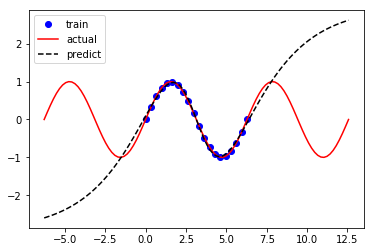

In [15]:
# generate prediction data
x = np.linspace(-2*np.pi,4*np.pi,100)
y = np.sin(x)
# scale input
X3 = x*s.scale_[0]+s.min_[0]
# predict
Y3P = model.predict(X3)
# unscale output
yp = (Y3P-s.min_[1])/s.scale_[1]

plt.figure()
plt.plot((X1-s.min_[0])/s.scale_[0], \
                 (Y1-s.min_[1])/s.scale_[1], \
                 'bo',label='train')
plt.plot(x,y,'r-',label='actual')
plt.plot(x,yp,'k--',label='predict')
plt.legend(loc='best')
plt.savefig('results.png')
plt.show()